Users of the data must reference this publication:
Barlow WE, White E, Ballard-Barbash R, Vacek PM, Titus-Ernstoff L, Carney PA, Tice JA, Buist DSM, Geller BM, Rosenberg R, Yankaskas BC, Kerlikowske K. Prospective breast cancer risk prediction model for women undergoing screening mammography. J Natl Cancer Inst. 2006; 98:1204-1214.

And acknowledge the funding source of the BCSC with the following reference:

"Data collection and sharing was supported by the National Cancer Institute-funded Breast Cancer Surveillance Consortium (HHSN261201100031C). You can learn more about the BCSC at: http://www.bcsc-research.org/."


Data Documentation - https://www.bcsc-research.org/data/rfdataset/dataset

In [1]:
import numpy as np
import pandas as pd

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

In [2]:
data = pd.read_csv('datasets/risk_dataset_2.csv', header=None )
data.columns = ['menopaus', 'age_grp', 'density', 'race', 'hispanic', 'bmi', 'age_first', 'nrelbc', 'brstproc', 
              'lastmamm', 'surgmeno', 'hrt', 'invasive', 'cancer', 'training', 'count']

In [3]:
data.shape

(181903, 16)

In [4]:
data

,menopaus,age_grp,density,race,hispanic,bmi,age_first,nrelbc,brstproc,lastmamm,surgmeno,hrt,invasive,cancer,training,count
0,0,1,1,1,0,1,0,0,0,0,9,9,0,0,1,3
1,0,1,1,1,0,1,0,0,0,9,9,9,0,0,0,2
2,0,1,1,1,0,1,0,0,0,9,9,9,0,0,1,3
3,0,1,1,1,0,1,1,0,0,0,9,9,0,0,1,1
4,0,1,1,1,0,1,1,0,1,9,9,9,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181898,9,4,9,9,9,9,9,9,9,1,9,9,0,0,1,31
181899,9,4,9,9,9,9,9,9,9,9,9,9,0,0,0,154
181900,9,4,9,9,9,9,9,9,9,9,9,9,0,0,1,493
181901,9,4,9,9,9,9,9,9,9,9,9,9,1,1,0,1


In [5]:
data.describe()

,menopaus,age_grp,density,race,hispanic,bmi,age_first,nrelbc,brstproc,lastmamm,surgmeno,hrt,invasive,cancer,training,count
count,181903.000000,181903.000000,181903.000000,181903.000000,181903.000000,181903.000000,181903.000000,181903.000000,181903.000000,181903.000000,181903.000000,181903.000000,181903.000000,181903.000000,181903.000000,181903.000000
mean,1.344150,5.329995,4.100609,3.125941,2.780828,4.862559,3.547550,1.497826,1.356135,3.509046,4.351127,3.478662,0.027003,0.034491,0.655806,5.539546
std,2.023965,2.424028,2.962819,3.151730,4.021810,3.496583,4.056065,3.027830,2.865927,4.341406,4.299688,4.111375,0.162094,0.182487,0.475106,28.144444
min,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,3.000000,2.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,5.000000,3.000000,1.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,1.000000,7.000000,9.000000,4.000000,9.000000,9.000000,9.000000,1.000000,1.000000,9.000000,9.000000,9.000000,0.000000,0.000000,1.000000,3.000000
max,9.000000,10.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,1.000000,1.000000,3867.000000


In [6]:
data.quantile([0.9,0.95,0.99])

,menopaus,age_grp,density,race,hispanic,bmi,age_first,nrelbc,brstproc,lastmamm,surgmeno,hrt,invasive,cancer,training,count
0.90,1.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,0.0,0.0,1.0,8.00
0.95,9.0,10.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,0.0,0.0,1.0,18.00
0.99,9.0,10.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,1.0,1.0,1.0,75.98


In [7]:
#data with training of 0 should be in test and training of 1 in train then delete train column
#cancer column is target, re-order columns?

In [8]:
#see me for ideas - https://thesai.org/Downloads/Volume11No8/Paper_8-Predicting_Breast_Cancer_via_Supervised_Machine.pdf

In [9]:
import seaborn as sns


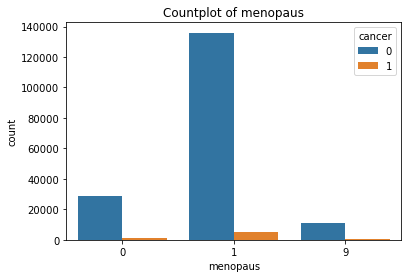

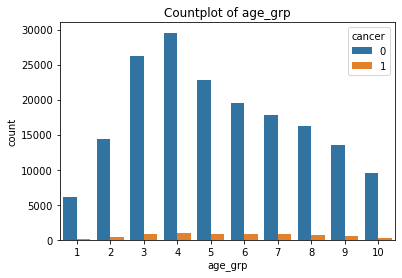

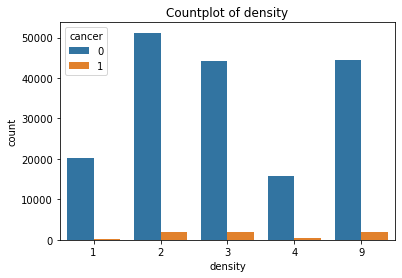

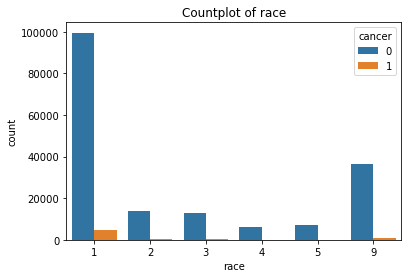

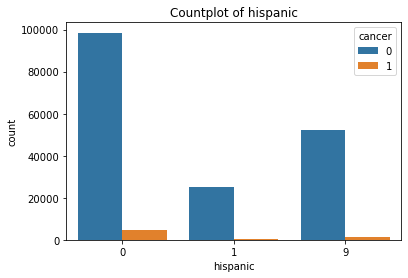

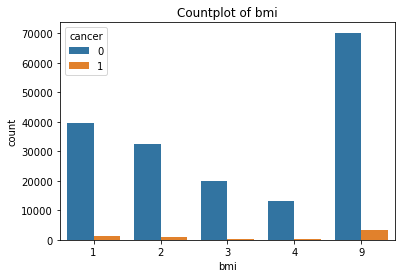

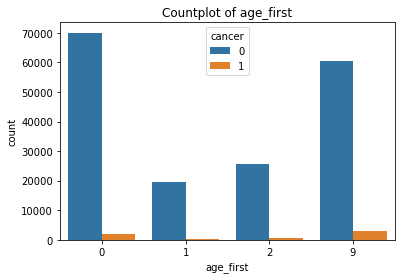

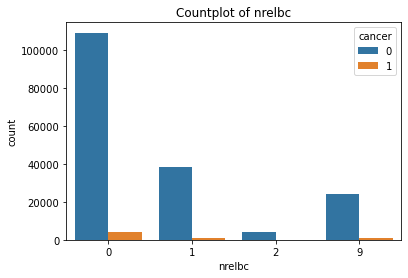

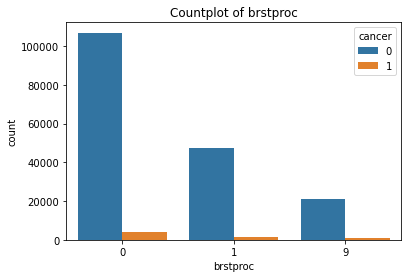

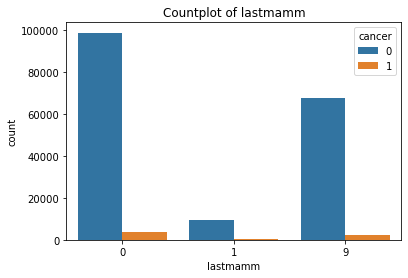

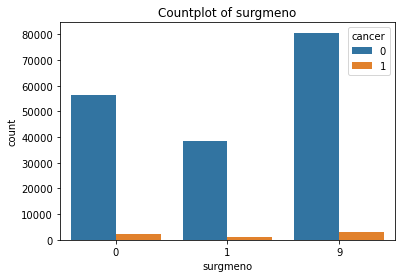

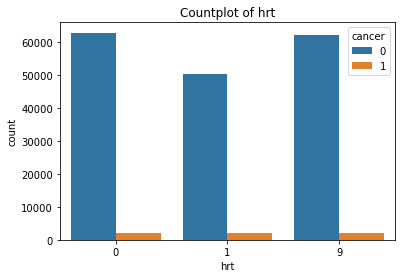

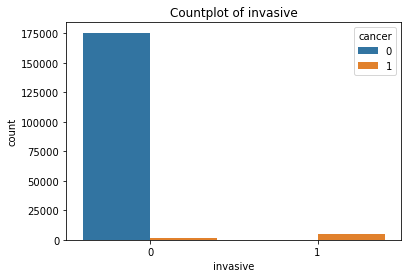

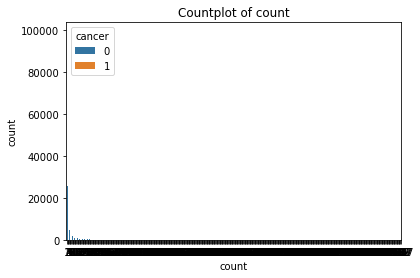

<Figure size 432x288 with 0 Axes>

In [10]:
import matplotlib.pyplot     as plt
for col in ['menopaus', 'age_grp', 'density', 'race', 'hispanic', 'bmi', 'age_first', 'nrelbc', 'brstproc', 
              'lastmamm', 'surgmeno', 'hrt', 'invasive', 'count']:
    sns.countplot(data = data, x = col, hue ='cancer')
    plt.title('Countplot of {0}'.format(col))
    plt.figure()

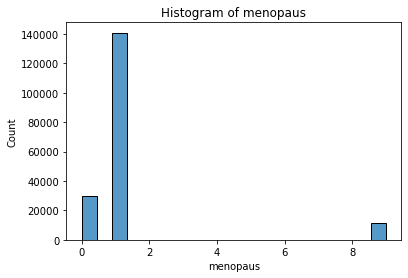

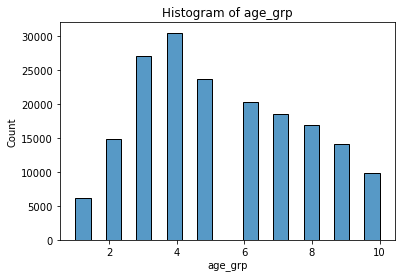

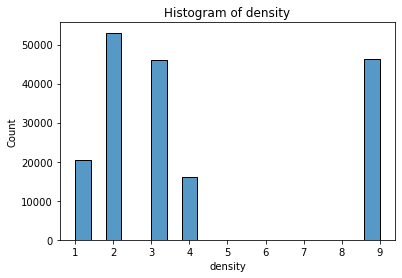

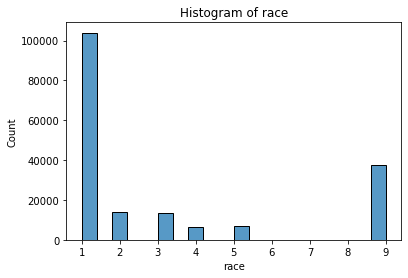

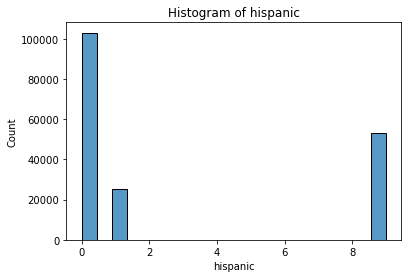

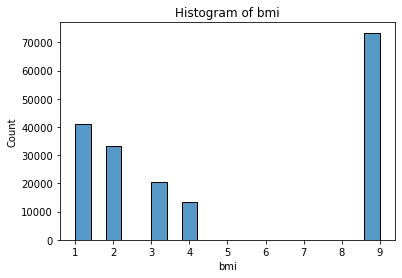

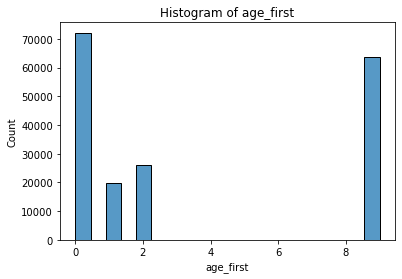

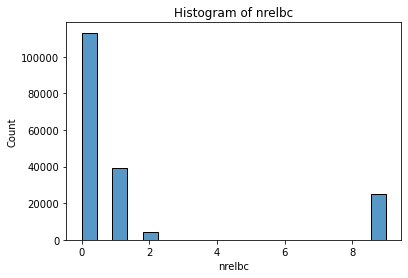

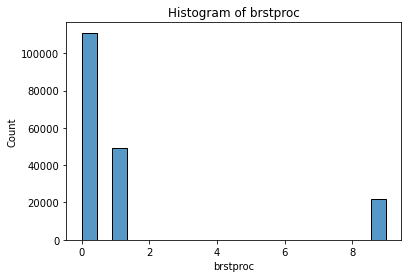

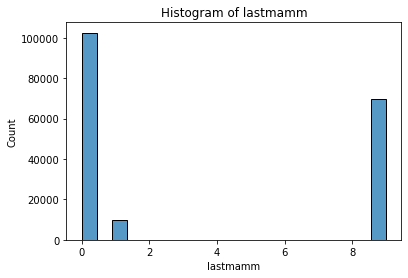

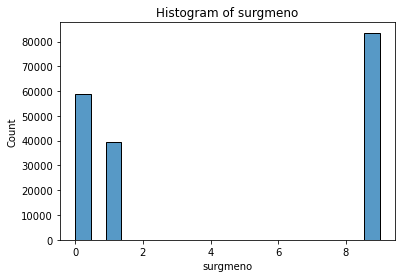

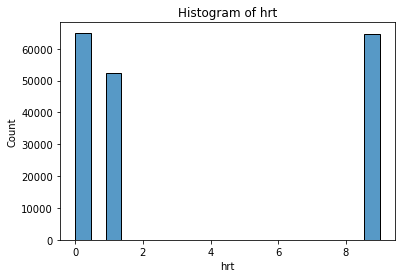

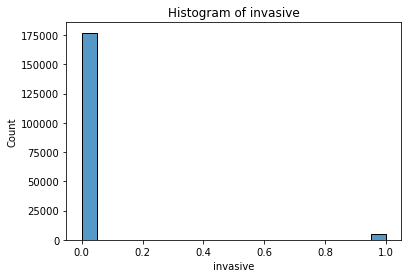

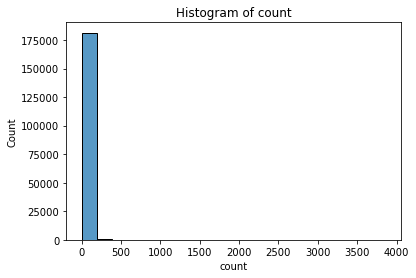

<Figure size 432x288 with 0 Axes>

In [11]:
# Plotting histogram to view data distribution
for col in ['menopaus', 'age_grp', 'density', 'race', 'hispanic', 'bmi', 'age_first', 'nrelbc', 'brstproc', 
              'lastmamm', 'surgmeno', 'hrt', 'invasive', 'count']:
    sns.histplot(data = data, x = col, bins = 20)
    plt.title('Histogram of {0}'.format(col))
    plt.figure()


In [12]:
#Do Cramer's V
#Do Mode

In [13]:
# defining function for plotting correlation heatmap
def plot_heatmap(correlation, title):
    plt.figure(figsize=(15, 8))
    ax = sns.heatmap(correlation,annot=True,fmt='.3f',linewidths=0.3,annot_kws={"size": 18})
    plt.xticks(fontsize=12) 
    plt.yticks(fontsize=12) 
    plt.title(title, fontsize=20)
    ax.figure.axes[-1].tick_params(labelsize=18) # To increase fontsize of colorbar ticks
    #lim = len(correlation.columns)
    #ax.set_ylim([0,lim]) # to make the map display correctly without trimming the edges
    plt.show()
    return

In [14]:
"""data_first_half = data[['menopaus', 'age_grp', 'density', 'race', 'hispanic', 'bmi', 'age_first', 'cancer']]
data_second_half = data[['nrelbc', 'brstproc', 'lastmamm', 'surgmeno', 'hrt', 'invasive', 'cancer', 'count']]
plot_heatmap(data_first_half.corr(), 'Correlation between features')
plot_heatmap(data_second_half.corr(), 'Correlation between features')"""


"data_first_half = data[['menopaus', 'age_grp', 'density', 'race', 'hispanic', 'bmi', 'age_first', 'cancer']]\ndata_second_half = data[['nrelbc', 'brstproc', 'lastmamm', 'surgmeno', 'hrt', 'invasive', 'cancer', 'count']]\nplot_heatmap(data_first_half.corr(), 'Correlation between features')\nplot_heatmap(data_second_half.corr(), 'Correlation between features')"

In [15]:
corrm = data.corr()

pos_cor = corrm['cancer'] >0
corrm['cancer'][pos_cor].sort_values(ascending = False).to_frame()

,cancer
cancer,1.000000
invasive,0.881413
age_first,0.054298
bmi,0.037222
training,0.030339
density,0.027766
age_grp,0.026777
surgmeno,0.000182


In [16]:
neg_cor = corrm['cancer'] <0
corrm['cancer'][neg_cor].sort_values(ascending = True).to_frame()

,cancer
hispanic,-0.037452
race,-0.033083
count,-0.029367
brstproc,-0.008413
menopaus,-0.005317
hrt,-0.001921
lastmamm,-0.001747
nrelbc,-0.001148


IDEAS FOR EDA

Hypothesis test in this project
How important is race in determining breast cancer? Do t-test and chi-squared test.
What other hypotheses can we come up with?


BRCA Mutations?

In [17]:
from scipy import interp
from scipy.optimize import fsolve
from scipy.stats import chi2_contingency, ttest_ind

In [18]:
for col in ['menopaus', 'age_grp', 'density', 'race', 'hispanic', 'bmi', 'age_first', 'nrelbc', 'brstproc', 'lastmamm', 'surgmeno', 'hrt', 'invasive', 'cancer']:
    print('Number of unknowns in', col, (data[col] == 9).sum())

Number of unknowns in menopaus 11518
Number of unknowns in age_grp 14037
Number of unknowns in density 46296
Number of unknowns in race 37367
Number of unknowns in hispanic 53376
Number of unknowns in bmi 73445
Number of unknowns in age_first 63669
Number of unknowns in nrelbc 24923
Number of unknowns in brstproc 21971
Number of unknowns in lastmamm 69861
Number of unknowns in surgmeno 83545
Number of unknowns in hrt 64489
Number of unknowns in invasive 0
Number of unknowns in cancer 0


In [19]:
#for col in ['menopaus', 'age_grp', 'density', 'race', 'hispanic', 'bmi', 'age_first', 'nrelbc', 'brstproc', 'lastmamm', 'surgmeno', 'hrt', 'invasive']:
data_known = data.query('(menopaus != 9) and (age_grp != 9) and (density != 9) and (race != 9) and (bmi != 9) and (age_first != 9) and (nrelbc != 9) and (brstproc != 9) and (lastmamm != 9) and (surgmeno != 9) and (hrt != 9) and (hispanic != 9)')


In [20]:
#contingency & stratified contingency tables for the race data?
data_known.shape

(10314, 16)

In [21]:
def get_ct(df, var):
    ct_res = pd.crosstab(df[var], df['cancer'], margins=True)
    ct_res['Incidence(%)'] = round( ct_res[1]/ct_res['All']*100, 2)
    return ct_res.drop(columns='All')

In [22]:
def get_ct_stra(df,stra_var):
    ct_stra = pd.crosstab(index=[stra_var,df.race], columns = df.cancer, margins = True)
    ct_stra['Incidence(%)'] = round(ct_stra[1]/ct_stra['All']*100,2)
    return ct_stra.drop(columns='All').drop('All', level=0)

Is this p-value statistically significant? Yes. Why? enrollment bias? missing demographic data? differences in clinical follow-up?

## Analysis on entire dataset
#### Cancer here refers to invasive ductal carcinoma or ductal carcinoma in situ

In [23]:
data.columns

Index(['menopaus', 'age_grp', 'density', 'race', 'hispanic', 'bmi',
       'age_first', 'nrelbc', 'brstproc', 'lastmamm', 'surgmeno', 'hrt',
       'invasive', 'cancer', 'training', 'count'],
      dtype='object')

In [24]:
#Using original data for this!!!
#0 = no; 1 = yes; 9 = unknown
get_ct_stra(data, data.hispanic)

cancer             0     1  Incidence(%)
hispanic race                           
0        1     64184  3803          5.59
         2     11029   188          1.68
         3     11007   350          3.08
         4      3662    38          1.03
         5      3706    37          0.99
         9      4935   131          2.59
1        1     15072   302          1.96
         2       521     4          0.76
         3       229     1          0.43
         4       375     3          0.79
         5      2443    20          0.81
         9      6430    57          0.88
9        1     20250   379          1.84
         2      2069    52          2.45
         3      1638    11          0.67
         4      2248    18          0.79
         5       887    10          1.11
         9     24944   870          3.37

In [25]:
get_ct(data, 'race')

cancer,0,1,Incidence(%)
race,,,
1,99506,4484,4.31
2,13619,244,1.76
3,12874,362,2.73
4,6285,59,0.93
5,7036,67,0.94
9,36309,1058,2.83
All,175629,6274,3.45


In [26]:
get_ct(data, 'age_grp')

cancer,0,1,Incidence(%)
age_grp,,,
1,6121,77,1.24
2,14335,438,2.96
3,26258,760,2.81
4,29542,952,3.12
5,22834,890,3.75
6,19518,792,3.90
7,17763,774,4.18
8,16255,707,4.17
9,13475,562,4.00


In [27]:
get_ct(data, 'age_first')

cancer,0,1,Incidence(%)
age_first,,,
0,70021,2115,2.93
1,19471,436,2.19
2,25566,625,2.39
9,60571,3098,4.87
All,175629,6274,3.45


In [28]:
get_ct(data, 'bmi')

cancer,0,1,Incidence(%)
bmi,,,
1,39646,1363,3.32
2,32406,987,2.96
3,20075,435,2.12
4,13303,243,1.79
9,70199,3246,4.42
All,175629,6274,3.45


Incidence Rate is still higher for non-hispanic white folks

In [29]:
def plot_cnf_matrix(cnf_matrix):
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

## What are the most important features?

- Invasive should not be a feature in predicting Invasive ductal carcinoma or DC in situ because the latter results in the former. It is likely that knowledge on invasive breast cancer already means that IDC or DC in situ has already been diagnosed? Thus including invasive as a label in predicting IDC or DC in situ will result in data leakage. Including invasive as a feature in logistic regression model resulting in a coefficient of 40 088 whereas all other coeffs were less than 2. Also shown in the high positive correlation between invasive and cancer (0.88)

In [30]:
#any records with race not ( 1 or white) and hispanic
print('Number of non-white hispanics in', len(data.query('race != 1 & hispanic == 1')))
#any records with invasive 1 and cancer 1 should be a lot
print('Number of patients diagnosed with both Ductal Carcinoma and Invasive Breast Cancer', len(data.query('invasive == 1 & cancer == 1')))
#any records with invasive 1 and cancer 0 unlikely
print('Number of patients diagnosed with Invasive Breast Cancer and NOT Ductal Carcinoma', len(data.query('invasive == 1 & cancer == 0')))


Number of non-white hispanics in 10083
Number of patients diagnosed with both Ductal Carcinoma and Invasive Breast Cancer 4912
Number of patients diagnosed with Invasive Breast Cancer and NOT Ductal Carcinoma 0


### Challenges 

- Medical data such as this can be highly class imbalanced. 
- Since the incidence rate of cancer is very low (highest at ~5%), the model achieved high accuracy predicting no cancer for all samples leading to bad precision and recall (values of 0) 

## SMOTE Algorithm

Synthetic Minority Oversampling Technique

In [31]:
!pip install imblearn


## Minority Oversampling on the entire dataset

In [32]:
from sklearn.model_selection import train_test_split
X = data[['menopaus', 'age_grp', 'density', 'race', 'hispanic', 'bmi', 'age_first', 'nrelbc', 'brstproc', 'lastmamm', 'surgmeno', 'hrt']]
y = data['cancer']


In [33]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.33, random_state=42)

Shape of X before SMOTE: (181903, 12)
Shape of X after SMOTE: (351258, 12)

Balance of positive and negative classes (%):


## Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# fit the model with data
model.fit(X_train,y_train)

#predictions
y_pred=model.predict(X_test)

In [35]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[35645, 22382],
       [26516, 31373]])

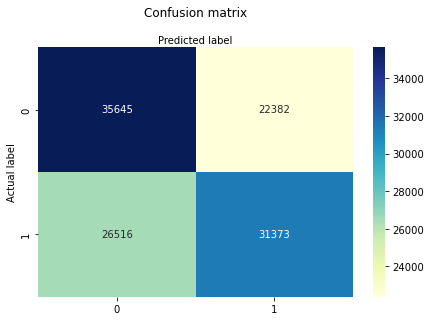

In [36]:
plot_cnf_matrix(cnf_matrix)

In [37]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print("Area Under the Curve", metrics.auc(fpr, tpr))

Accuracy: 0.5781600469305359
Precision: 0.5836294298204818
Recall: 0.5419509751420822
Area Under the Curve 0.5781169906644287


In [38]:
#rank logistic regression coeffs
odds = np.exp(model.coef_[0])
pd.DataFrame(odds, 
             X_train.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
age_first,1.071530
bmi,1.036547
density,1.033254
age_grp,1.012879
lastmamm,1.003210
hrt,1.002985
surgmeno,0.996152
menopaus,0.974277
hispanic,0.973679
brstproc,0.964362


## Support Vector Machines

In [39]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred=model.predict(X_test)

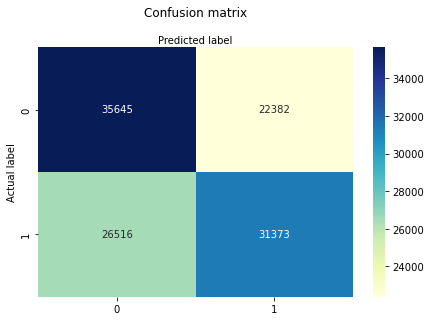

In [40]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
plot_cnf_matrix(cnf_matrix)

In [41]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))


Accuracy: 0.5781600469305359
Precision: 0.5836294298204818
Recall: 0.5419509751420822


In [42]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print("Area Under the Curve", metrics.auc(fpr, tpr))

Area Under the Curve 0.5781169906644287


## Gradient Boost Algorithm

In [43]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

g_boost = GradientBoostingClassifier(random_state = 0)

g_boost_params = [{'n_estimators':[150, 200, 250, 300, 400, 450]}]
g_boost_grid = GridSearchCV(g_boost, g_boost_params, cv=10)
g_boost_grid.fit(X_train, y_train)
g_boost_average_score = g_boost_grid.cv_results_['mean_test_score'].astype(float)
result = g_boost_grid.cv_results_
g_boost_grid.best_estimator_

CPU times: user 28min 32s, sys: 3.07 s, total: 28min 35s
Wall time: 28min 35s


GradientBoostingClassifier(n_estimators=450, random_state=0)

In [44]:
g_boost_average_score

array([0.80901412, 0.81546006, 0.81956048, 0.82330822, 0.82822872,
       0.8300261 ])

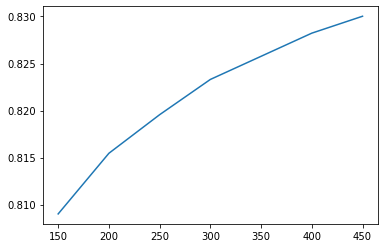

In [45]:
plt.figure()
sns.lineplot(x=[150, 200, 250, 300, 400, 450], y=g_boost_average_score)
plt.show()

In [46]:
%%time
# Building model with optimal parameters
g_boost = GradientBoostingClassifier(n_estimators=150, random_state=0)
g_boost.fit(X_train, y_train)

print("Training Set Evaluation")
print("Accuracy: ", metrics.accuracy_score(y_train, g_boost.predict(X_train)))

Training Set Evaluation
Accuracy:  0.8112364133898752
CPU times: user 16.4 s, sys: 19.1 ms, total: 16.4 s
Wall time: 16.4 s


In [47]:
# Evaluating the model on the test set
g_boost_pred = g_boost.predict(X_test)
print("Test Set Evaluation")
print("Accuracy: ", metrics.accuracy_score(y_test, g_boost_pred))
print("Precision:", metrics.precision_score(y_test, g_boost_pred))
print("Recall:",metrics.recall_score(y_test, g_boost_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test, g_boost_pred)
print("Area Under Curve", metrics.auc(fpr, tpr))

Test Set Evaluation
Accuracy:  0.8099658373304807
Precision: 0.8018247007928359
Recall: 0.8228506279258581
Area Under Curve 0.8099811586559169


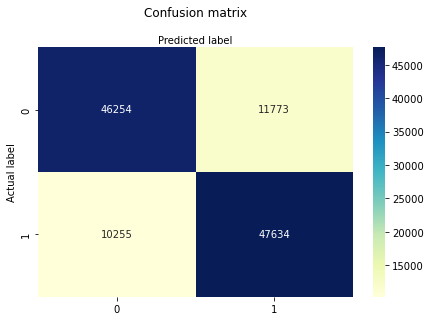

In [48]:
cnf_matrix = metrics.confusion_matrix(y_test, g_boost_pred)
plot_cnf_matrix(cnf_matrix)

## Random Minority Oversampling on only Training and Validation data

More representative of real life. 

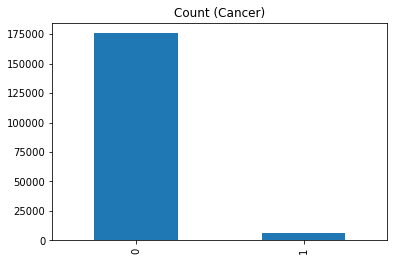

In [49]:
data['cancer'].value_counts().plot(kind='bar', title='Count (Cancer)');

Default Ratio of Cancer to No-Cancer samples in dataset is **3:100** i.e 3% of the data has a label of 1 and the ratio of minority class to majority is 0.03

In [50]:
models = []

model_lr = LogisticRegression()
models.append(model_lr)
model_svm = svm.SVC()
models.append(model_svm)
g_boost = GradientBoostingClassifier(n_estimators=450, random_state=0)
models.append(g_boost)

In [57]:
#subplots row for each sampling ratio and column for each model.
#plot against model names
train_accuracy = np.zeros((4,3))
val_accuracy = np.zeros((4,3))
test_accuracy = np.zeros((4,3)) 
#plot against model name
train_precision = np.zeros((4,3)) 
val_precision = np.zeros((4,3))
test_precision = np.zeros((4,3))
#plot against model name
train_recall = np.zeros((4,3))
val_recall = np.zeros((4,3))
test_recall = np.zeros((4,3))
#plot against model name
train_auc = np.zeros((4,3))
val_auc = np.zeros((4,3)) 
test_auc = np.zeros((4,3)) 

In [58]:
%%time
minority_ratios = [0.25, 0.3, 0.4, 0.5]
#Randomly oversample minority data with the ratios above to get best performance
for idx,r in enumerate(minority_ratios):
    X = data[['menopaus', 'age_grp', 'density', 'race', 'hispanic', 'bmi', 'age_first', 'nrelbc', 'brstproc', 'lastmamm', 'surgmeno', 'hrt']]
    y = data['cancer']
    #split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # randomly oversample minority
    sm = SMOTE(sampling_strategy = r, random_state=42)
    X_sm, y_sm = sm.fit_resample(X_train, y_train)    

    #split train into train and val
    X_train, X_val, y_train, y_val = train_test_split(X_sm, y_sm, test_size=0.1, random_state=42)

    #call models
    for jdx, m in enumerate(models):
        #compute training metrics
        m.fit(X_train, y_train)
        train_accuracy[idx][jdx] = metrics.accuracy_score(y_train, m.predict(X_train))
        print("r,m,accuracy",r,m,train_accuracy[idx])
        train_precision[idx][jdx] = metrics.precision_score(y_train, m.predict(X_train), zero_division=0)
        train_recall[idx][jdx] = metrics.recall_score(y_train, m.predict(X_train))
        fpr, tpr, thresholds = metrics.roc_curve(y_train, m.predict(X_train))
        train_auc[idx][jdx] = metrics.auc(fpr, tpr)
        #compute validation metrics
        m.fit(X_val, y_val)
        val_accuracy[idx][jdx] = metrics.accuracy_score(y_val, m.predict(X_val))
        val_precision[idx][jdx] = metrics.precision_score(y_val, m.predict(X_val), zero_division=0)
        val_recall[idx][jdx] = metrics.recall_score(y_val, m.predict(X_val))
        fpr, tpr, thresholds = metrics.roc_curve(y_val, m.predict(X_val))
        val_auc[idx][jdx] = metrics.auc(fpr, tpr)
        print("r,m,auc",r,m,val_auc[idx])
        #test prediction and metrics
        test_accuracy[idx][jdx] = metrics.accuracy_score(y_test, m.predict(X_test))
        test_precision[idx][jdx] = metrics.precision_score(y_test, m.predict(X_test), zero_division=0)
        test_recall[idx][jdx] = metrics.recall_score(y_test, m.predict(X_test))
        fpr, tpr, thresholds = metrics.roc_curve(y_test, m.predict(X_test))
        test_auc[idx][jdx] = metrics.auc(fpr, tpr)
        print("r,m,precision",r,m,test_precision[idx])


r,m,accuracy 0.25 LogisticRegression() [0.79985575 0.         0.        ]
r,m,auc 0.25 LogisticRegression() [0.5 0.  0. ]
r,m,precision 0.25 LogisticRegression() [0. 0. 0.]
r,m,accuracy 0.25 SVC() [0.79985575 0.85279901 0.        ]
r,m,auc 0.25 SVC() [0.5        0.53853684 0.        ]
r,m,precision 0.25 SVC() [0.         0.21107266 0.        ]
r,m,accuracy 0.25 GradientBoostingClassifier(n_estimators=450, random_state=0) [0.79985575 0.85279901 0.87750544]
r,m,auc 0.25 GradientBoostingClassifier(n_estimators=450, random_state=0) [0.5        0.53853684 0.7632177 ]
r,m,precision 0.25 GradientBoostingClassifier(n_estimators=450, random_state=0) [0.         0.21107266 0.21143474]
r,m,accuracy 0.3 LogisticRegression() [0.76927569 0.         0.        ]
r,m,auc 0.3 LogisticRegression() [0.5 0.  0. ]
r,m,precision 0.3 LogisticRegression() [0. 0. 0.]
r,m,accuracy 0.3 SVC() [0.76927569 0.84516176 0.        ]
r,m,auc 0.3 SVC() [0.5        0.62474368 0.        ]
r,m,precision 0.3 SVC() [0.        

In [ ]:
"""
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)"""

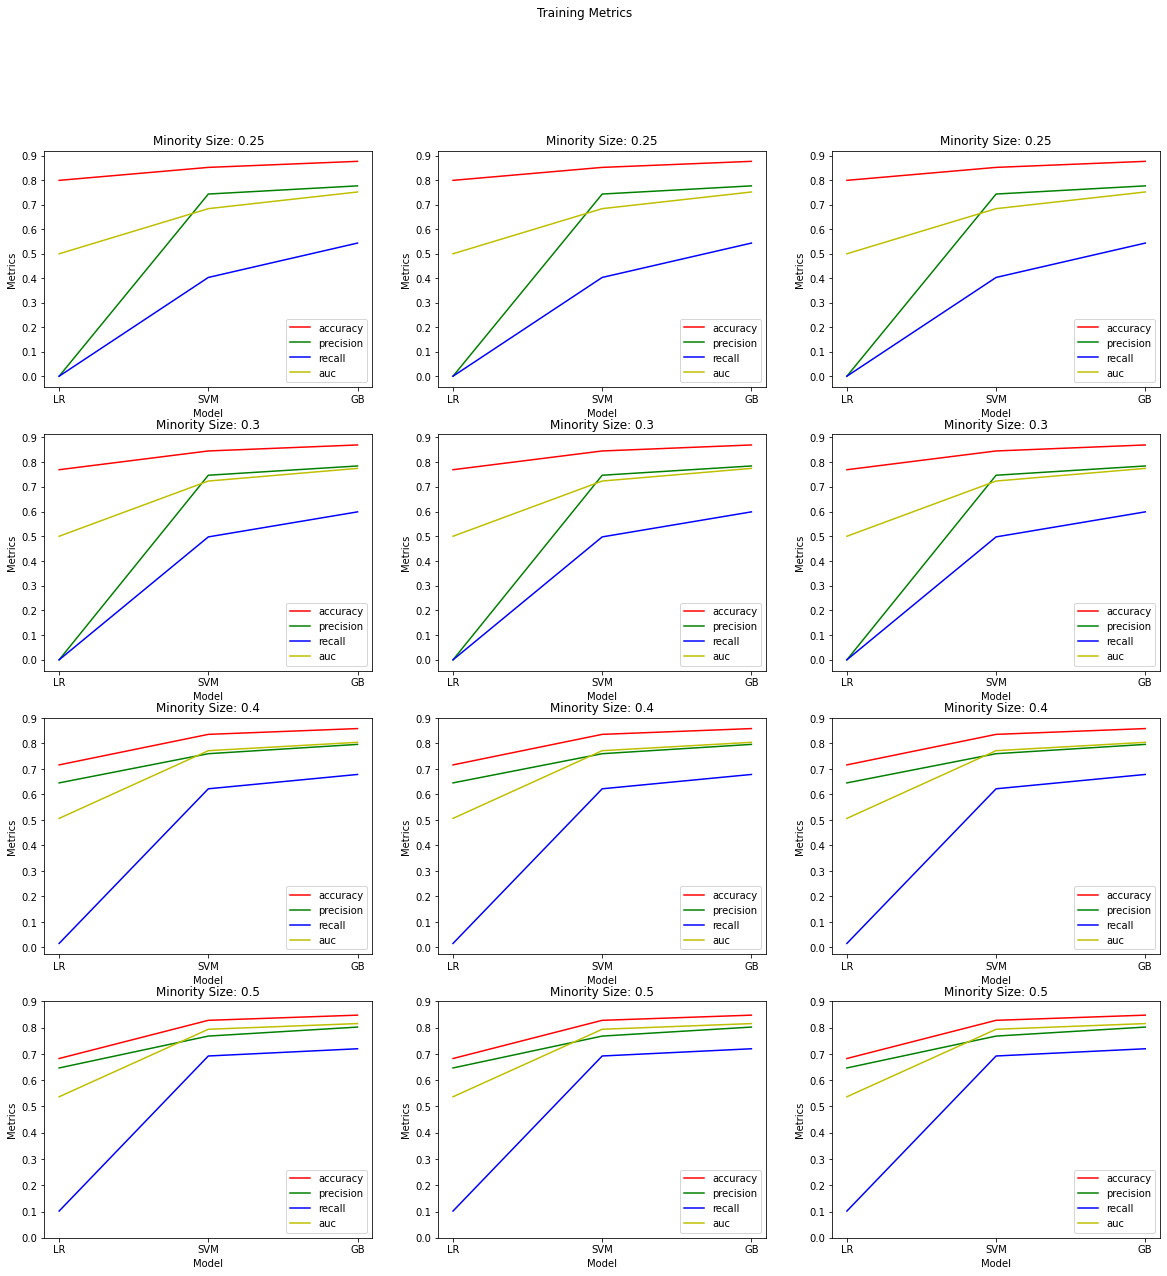

In [59]:
#plot training metrics
model_names = ["LR", "SVM", "GB"]
fig, axs = plt.subplots(4, 3,figsize=(20,20))
fig.suptitle('Training Metrics')

for r, ratio in enumerate(minority_ratios):
    for  m in range(len(models)):
        axs[r, m].set_title('Minority Size: {0}'.format(ratio))
        axs[r, m].plot(model_names, train_accuracy[r], color='r', label='accuracy')
        axs[r, m].plot(model_names, train_precision[r], color='g', label='precision')
        axs[r, m].plot(model_names, train_recall[r], color='b', label='recall')
        axs[r, m].plot(model_names, train_auc[r], color='y', label='auc')

        # Naming the x-axis, y-axis and the whole graph
        axs[r, m].set_xlabel("Model")
        axs[r, m].set_ylabel("Metrics")
        axs[r,m].set_yticks(np.arange(0, 1, step=0.1))

        # Adding legend, which helps us recognize the curve according to it's color
        axs[r, m].legend()

# To load the display window
plt.show()

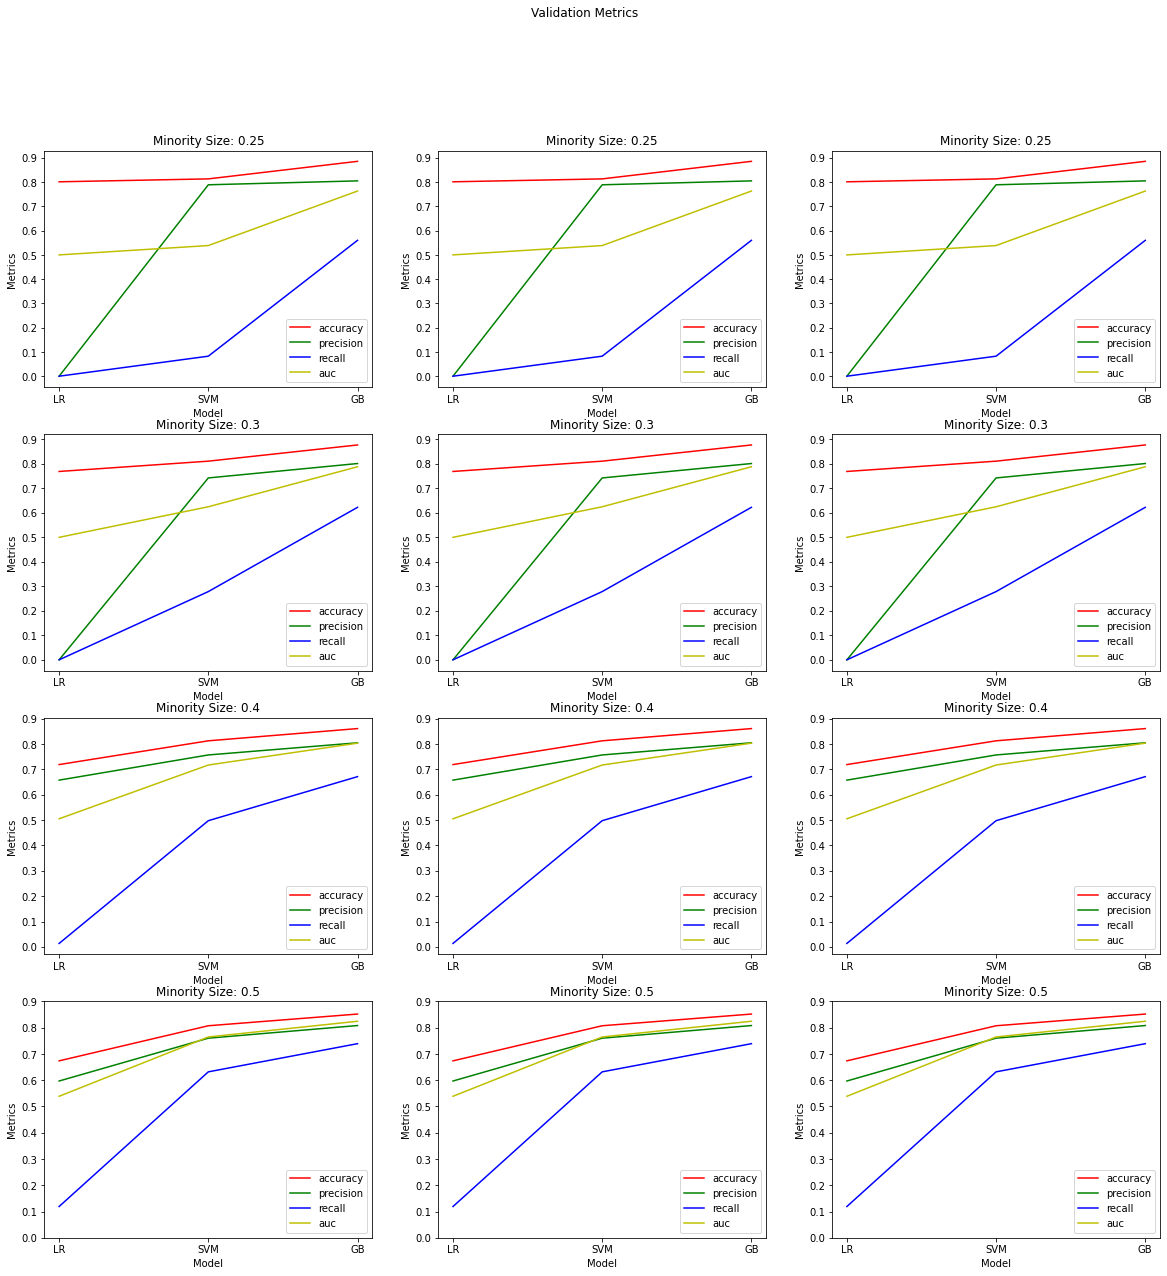

In [60]:
#plot training metrics
model_names = ["LR", "SVM", "GB"]
fig, axs = plt.subplots(4, 3,figsize=(20,20))
fig.suptitle('Validation Metrics')

for r, ratio in enumerate(minority_ratios):
    for  m in range(len(models)):
        axs[r, m].set_title('Minority Size: {0}'.format(ratio))
        axs[r, m].plot(model_names, val_accuracy[r], color='r', label='accuracy')
        axs[r, m].plot(model_names, val_precision[r], color='g', label='precision')
        axs[r, m].plot(model_names, val_recall[r], color='b', label='recall')
        axs[r, m].plot(model_names, val_auc[r], color='y', label='auc')

        # Naming the x-axis, y-axis and the whole graph
        axs[r, m].set_xlabel("Model")
        axs[r, m].set_ylabel("Metrics")
        axs[r,m].set_yticks(np.arange(0, 1, step=0.1))

        # Adding legend, which helps us recognize the curve according to it's color
        axs[r, m].legend()

# To load the display window
plt.show()

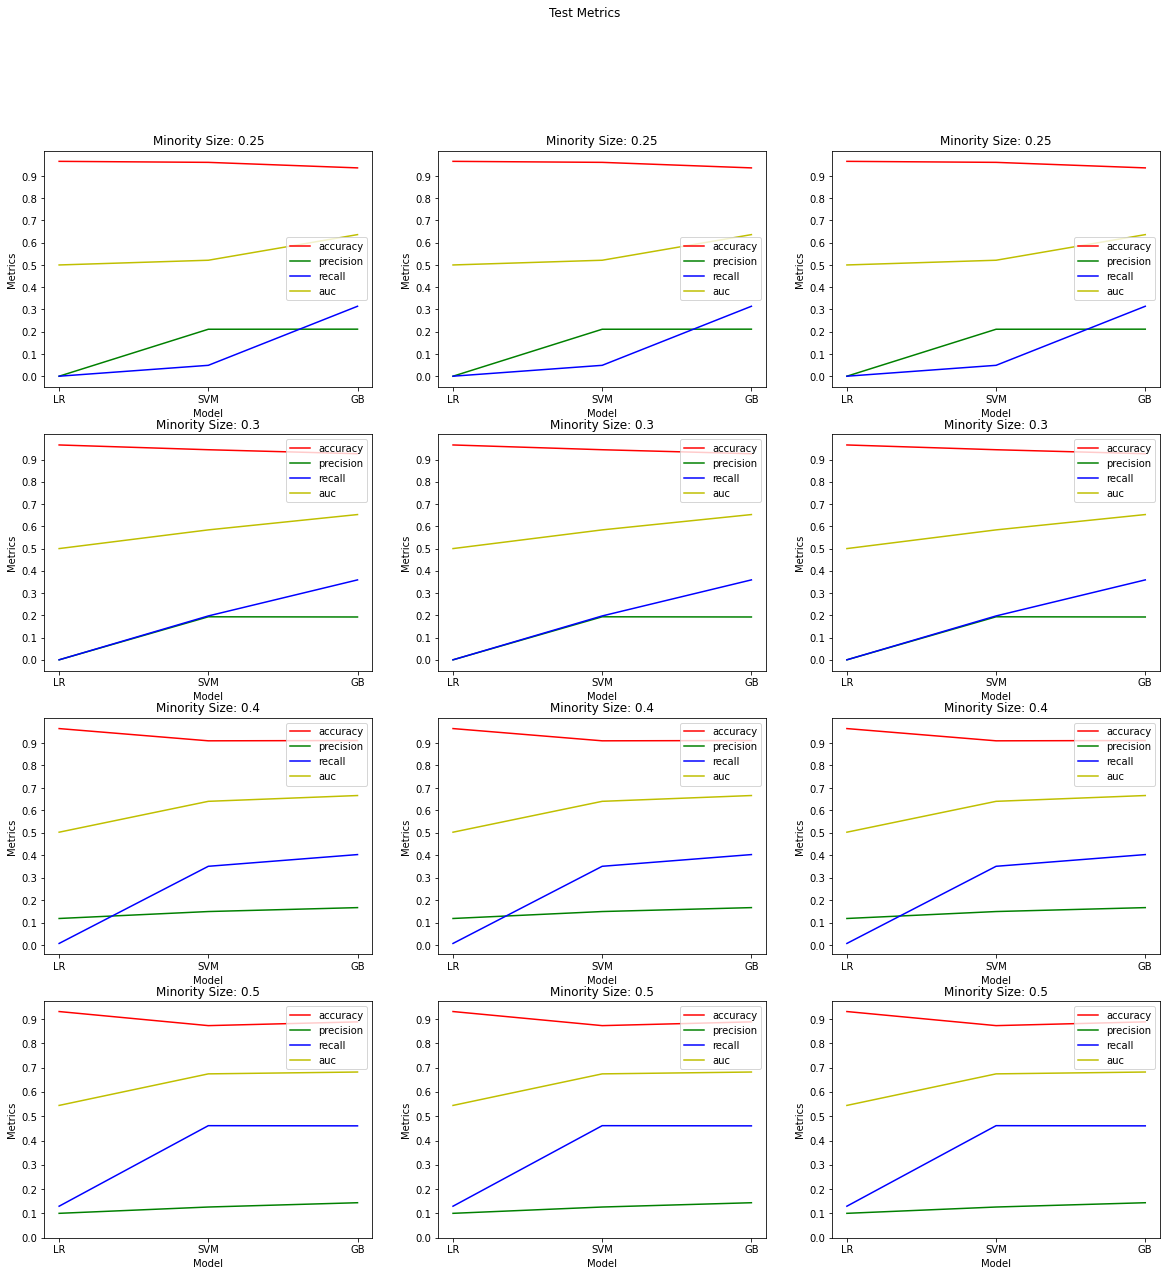

In [61]:
#plot training metrics
model_names = ["LR", "SVM", "GB"]
fig, axs = plt.subplots(4, 3,figsize=(20,20))
fig.suptitle('Test Metrics')

for r, ratio in enumerate(minority_ratios):
    for  m in range(len(models)):
        axs[r, m].set_title('Minority Size: {0}'.format(ratio))
        axs[r, m].plot(model_names, test_accuracy[r], color='r', label='accuracy')
        axs[r, m].plot(model_names, test_precision[r], color='g', label='precision')
        axs[r, m].plot(model_names, test_recall[r], color='b', label='recall')
        axs[r, m].plot(model_names, test_auc[r], color='y', label='auc')

        # Naming the x-axis, y-axis and the whole graph
        axs[r, m].set_xlabel("Model")
        axs[r, m].set_ylabel("Metrics")
        axs[r,m].set_yticks(np.arange(0, 1, step=0.1))

        # Adding legend, which helps us recognize the curve according to it's color
        axs[r, m].legend()

# To load the display window
plt.show()

In [62]:
#Printing Final Test Metrics
for r, ratio in enumerate(minority_ratios):
    for  m in range(len(models)):
        print("Test Accuracy for Minority Ratio {0}, Model {1}: {2}" .format(ratio, m, test_accuracy[r][m]))
        print("Test Precision for Minority Ratio {0}, Model {1}: {2}" .format(ratio, m, test_precision[r][m]))
        print("Test Recall for Minority Ratio {0}, Model {1}: {2}" .format(ratio, m, test_recall[r][m]))
        print("Test AUC for Minority Ratio {0}, Model {1}: {2}" .format(ratio, m, test_auc[r][m]))

Test Accuracy for Minority Ratio 0.25, Model 0: 0.9657238668535774
Test Precision for Minority Ratio 0.25, Model 0: 0.0
Test Recall for Minority Ratio 0.25, Model 0: 0.0
Test AUC for Minority Ratio 0.25, Model 0: 0.5
Test Accuracy for Minority Ratio 0.25, Model 1: 0.9611335587257085
Test Precision for Minority Ratio 0.25, Model 1: 0.21107266435986158
Test Recall for Minority Ratio 0.25, Model 1: 0.04891740176423416
Test AUC for Minority Ratio 0.25, Model 1: 0.5212139806680793
Test Accuracy for Minority Ratio 0.25, Model 2: 0.9363129105851956
Test Precision for Minority Ratio 0.25, Model 2: 0.21143473570658036
Test Recall for Minority Ratio 0.25, Model 2: 0.3143544506816359
Test AUC for Minority Ratio 0.25, Model 2: 0.6363711685297517
Test Accuracy for Minority Ratio 0.3, Model 0: 0.9657238668535774
Test Precision for Minority Ratio 0.3, Model 0: 0.0
Test Recall for Minority Ratio 0.3, Model 0: 0.0
Test AUC for Minority Ratio 0.3, Model 0: 0.5
Test Accuracy for Minority Ratio 0.3, Model

### Final Observations

The best model is the Gradient Boosting with 450 estimators. From the plots and values above we can see that
oversampling the training and validation sets with a higher minority ratio 0.4 or 0.5 is more desirable. 

**Best Accuracy : 0.89**

**Best AUC: 0.68**

**Best Recall: 0.46**

**Best Precision: 0.14 (Very Low)**